In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# custom libs
import sys
sys.path.append("..")
from src.libs.simulations import simulate_curves
from src.libs.dynamicFPC import K_dFPC, W_dFPC

ModuleNotFoundError: No module named 'sklearn'

In [2]:
# configurações de gráficos
plt.rcParams.update({

    # ---- Figure layout ----
    "figure.figsize": (12, 5),       # Nice default for time-series
    "figure.dpi": 110,
    "axes.spines.top": False,
    "axes.spines.right": False,

    # ---- Background colors ----
    "axes.facecolor": "#f7f7f7",
    "figure.facecolor": "#ffffff",
    "savefig.facecolor": "#ffffff",

    # ---- Grids ----
    "axes.grid": True,
    "grid.color": "0.85",
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,

    # ---- Fonts ----
    "font.size": 12,
    "axes.titlesize": 15,
    "axes.labelsize": 13,

    # ---- Lines ----
    "lines.linewidth": 1,

    # ---- Ticks ----
    "xtick.major.size": 0,
    "ytick.major.size": 0,

    # ---- Legend ----
    "legend.frameon": False,
})

# Optional: nicer color cycle (using seaborn palette)

import seaborn as sns
colors = sns.color_palette("deep")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

# NR = 1

In [3]:
# Configurações iniciais

n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
phis = [-0.775, 0.65, -0.525, 0.4] # AR(1) model coefficients
variance = 0.01

Y, X, mEps = simulate_curves(n,nt,u,phis, variances=np.full(len(phis), variance))

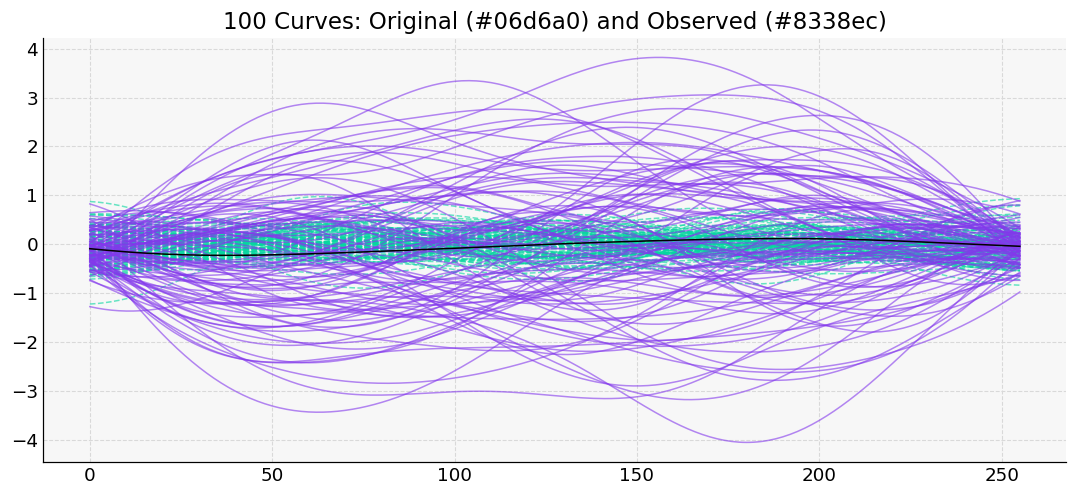

In [4]:

color_original = "#06d6a0"
plt.plot(X, alpha=.6, c=color_original, linestyle="--",label="Unobserved")

color_observed = "#8338ec"
plt.plot(Y, alpha=.6, c=color_observed, label="Observed")

plt.plot(np.mean(Y,axis=1), c="black")

plt.title(f"{n} Curves: Original ({color_original}) and Observed ({color_observed})")

plt.show()


## W-dFPC

In [12]:
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
dimensions = 10

WdFPC_model = W_dFPC(Y)
WdFPC_model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:612: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


In [14]:
WdFPC_fitted = WdFPC_model.Yhat

## K-dFPC

In [15]:
m=nt
lag_maximum = 5
du=0.05
p=5
dimensions = 10
u = u

KdFPC_model = K_dFPC(Y)
KdFPC_model.fit(
    lag_max=lag_maximum,
    alpha=0.10,
    du=0.05,
    B=1000,
    p=5,
    m=nt,
    u=u,
    select_ncomp=False,
    dimension=dimensions
)

In [16]:
KdFPC_fitted = KdFPC_model.fitted_values

## Compara resultados para curva específica

In [17]:
t = 0

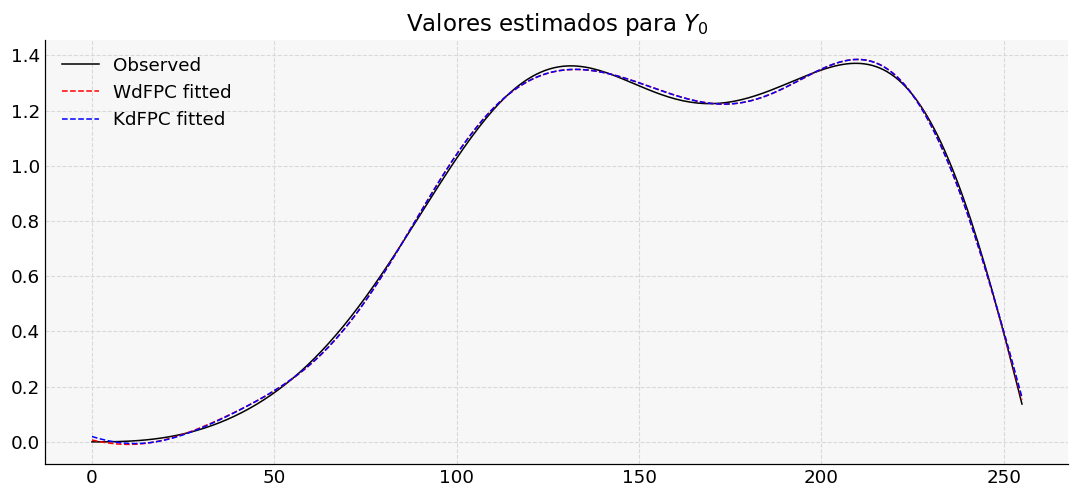

In [19]:
plt.figure()

plt.plot(Y[:, t], label="Observed", c="black")
plt.plot(WdFPC_fitted[:, t], label="WdFPC fitted", c="red", linestyle="--")
plt.plot(KdFPC_fitted[:, t], label="KdFPC fitted", c="blue", linestyle="--")

plt.legend()
plt.title(f"Valores estimados para $Y_{t}$")

plt.show()

In [21]:
def calculate_mse_numpy(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) using NumPy.

    Args:
        y_true (np.array): Actual observed values.
        y_pred (np.array): Predicted values.

    Returns:
        float: The calculated MSE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [27]:
print("MSE WdFPC:", calculate_mse_numpy(Y[:, t], WdFPC_fitted[:,t]))
print("MSE KdFPC:", calculate_mse_numpy(Y[:, t], KdFPC_fitted[:,t]))

MSE WdFPC: 0.00010386858785234597
MSE KdFPC: 0.00010271597533569358


In [31]:
avg_w_mse = []
avg_k_mse = []

for i in range(Y.shape[1]):
    avg_w_mse.append(calculate_mse_numpy(Y[:, i], WdFPC_fitted[:,t]))
    avg_k_mse.append(calculate_mse_numpy(Y[:, i], KdFPC_fitted[:,t]))

print("Overall MSE WdFPC:", np.mean(avg_w_mse))
print("Overall MSE KdFPC:", np.mean(avg_k_mse))

Overall MSE WdFPC: 2.301395068505497
Overall MSE KdFPC: 2.3015170369728266


# NR = 1000+

In [ ]:
NR = 100_000

# MSE
w_mse = []
k_mse = []
for nr in range(NR):
    if nr % 100 == 0:
        print(f"nr {nr}")
    n = 100          # sample size (curves)
    d = 2            # dimension parameter
    nt = 256         # number of grid points
    u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
    phis = [-0.775, 0.65, -0.525, 0.4] # AR(1) model coefficients
    variance = 0.01

    Y, X, mEps = simulate_curves(n,nt,u,phis, variances=np.full(len(phis), variance))

    ####### W-dFPC
    wavelet = 'db2'
    N = 3 # wavelet decomposition level
    p = 5 # lags
    dimensions = 10

    WdFPC_model = W_dFPC(Y)
    WdFPC_model.fit(
        nt=nt,
        N=N,
        wavelet=wavelet,
        p=p,
        d=dimensions)
    
    ####### W-dFPC
    m=nt
    lag_maximum = 5
    du=0.05
    p=5
    dimensions = 10
    u = u

    KdFPC_model = K_dFPC(Y)
    KdFPC_model.fit(
        lag_max=lag_maximum,
        alpha=0.10,
        du=0.05,
        B=1000,
        p=5,
        m=nt,
        u=u,
        select_ncomp=False,
        dimension=dimensions
    )

    i_w_mse = []
    i_k_mse = []
    for i in range(Y.shape[1]):
        i_w_mse.append(calculate_mse_numpy(Y[:, i], WdFPC_fitted[:,t]))
        i_k_mse.append(calculate_mse_numpy(Y[:, i], KdFPC_fitted[:,t]))

    w_mse.append(np.mean(i_w_mse))
    k_mse.append(np.mean(i_k_mse))

nr 0


c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:612: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


nr 100


In [ ]:
import pandas as pd
df_mse = pd.DataFrame({"Wavelet": w_mse, "KLE": k_mse})

,Wavelet,KLE
0,2.443850,2.443889
1,2.309231,2.309321
2,2.340908,2.340887
3,2.381161,2.381172
4,2.033989,2.034036
...,...,...
331,2.164773,2.164821
332,2.417862,2.417901
333,2.160096,2.160143
334,2.896418,2.896497


<Axes: >

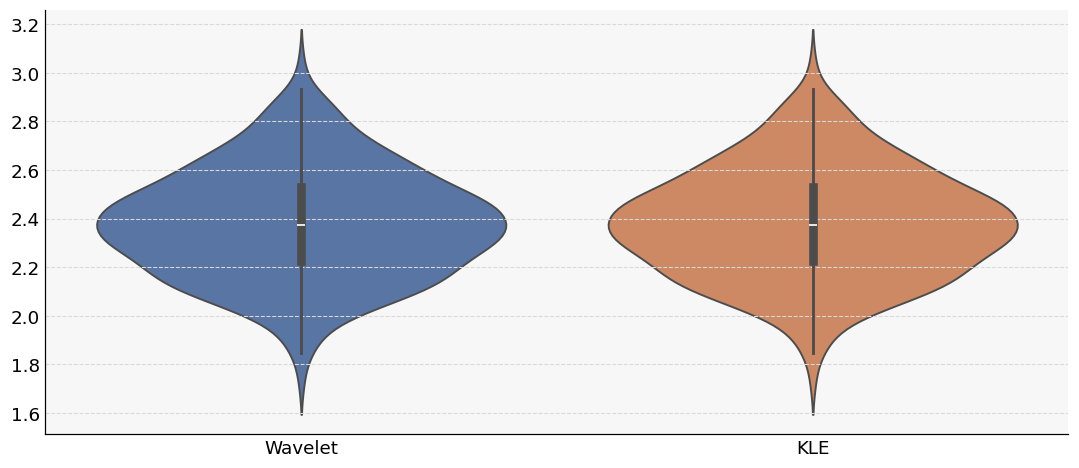

In [ ]:
import seaborn as sns

sns.violinplot(df_mse)